In [16]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d

In [18]:
beta = '08'
RC_list = ['5', '9', '20', '30', '40']
vphi_list = ['01', '02', '03']

sn = {}
prof = {}

for RC in RC_list:
    sn[RC] = {}
    prof[RC] = {}
    for vphi in vphi_list:
        outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
        sn[RC][vphi] = arepo.Snapshot(outname, 0)
        prof[RC][vphi] = gas_profile(sn[RC][vphi])

NameError: name 'gas_profile' is not defined

In [43]:
beta = '08'

RC_list = ['5', '9', '20', '30', '40']
vphi_list = ['01', '02', '03']

sfr = {}

for RC in RC_list:
    sfr[RC] = {}
    for vphi in vphi_list:
        outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
        sfr[RC][vphi] = np.genfromtxt(outname + '/sfr.txt')

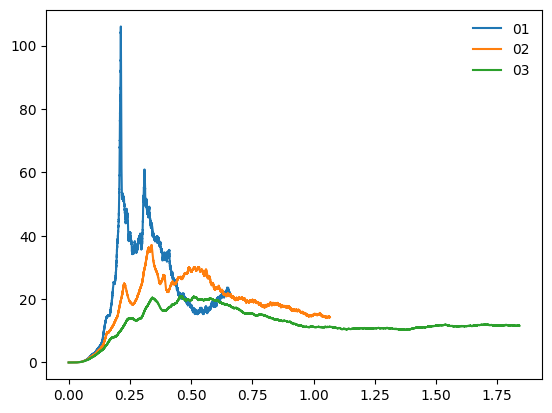

In [45]:
RC='5'

for vphi in vphi_list:
    plt.plot(sfr[RC][vphi][:,0], sfr[RC][vphi][:,2], label=vphi)

plt.legend(frameon=False)

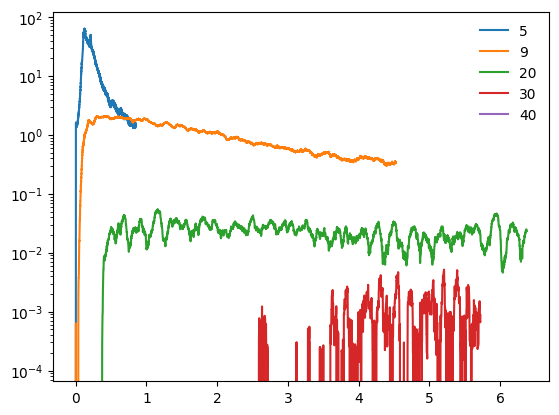

In [6]:
vphi='02'

for RC in RC_list:
    plt.plot(sfr[RC][vphi][:,0], sfr[RC][vphi][:,2], label=RC)

    plt.yscale('log')
    
plt.legend(frameon=False)

In [34]:
def weighted_median(values, weights):
    i = np.argsort(values)
    c = np.cumsum(weights[i])
    return values[i[np.searchsorted(c, 0.5 * c[-1])]]

def get_halfmass_radius(sn):
    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    
    if sn.NumPart_Total[4] == 0:
        return np.nan
    
    pos = sn.part4.pos.value - center
    mass = sn.part4.mass.value
    r = np.linalg.norm(pos, axis=1)
    
    is_star = sn.part4.GFM_StellarFormationTime > 0
    if np.sum(is_star) <= 1:
        return np.nan
    
    rhalf = weighted_median(r[is_star], mass[is_star])
    
    return rhalf

def get_stellar_mass(sn):
    if sn.NumPart_Total[4] == 0:
        return 0.0

    return np.sum(sn.part4.mass.value[sn.part4.GFM_StellarFormationTime > 0])

In [35]:
beta = '08'
RC='40'

sn_vphi = {}
time = {}
rhalf = {}
stmass = {}

idx_list = np.arange(0, 101, 2)



for vphi in vphi_list:
    sn_vphi[vphi] = {}
    rhalf[vphi] = []
    time[vphi] = []
    stmass[vphi] = []
    for idx in tqdm(idx_list):
        try:
            outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
            sn_vphi[vphi] = arepo.Snapshot(outname, idx)
        except:
            continue
        
        time[vphi].append(sn_vphi[vphi].Time.value)
        rhalf[vphi].append(get_halfmass_radius(sn_vphi[vphi]))
        stmass[vphi].append(get_stellar_mass(sn_vphi[vphi]))

100%|██████████| 51/51 [00:03<00:00, 13.75it/s]


[nan, nan, nan, nan, 4.492440837078522, 2.3667019373296387, 1.7241849561951106, 1.4826471034169564, 1.093645121252713]
[0.0, 0.2001953125, 0.400390625, 0.6005859375, 0.80078125, 1.0009765625, 1.201171875, 1.4013671875, 1.6015625]
[nan, nan, nan, nan, 7.132096026854898, 4.790255178231007, 4.716816905050874, 5.68532220494006, 4.830253191565995, 5.300913761478065, 4.06612745761793, 3.8534376620114696]
[0.0, 0.2001953125, 0.400390625, 0.6005859375, 0.80078125, 1.0009765625, 1.201171875, 1.4013671875, 1.6015625, 1.8017578125, 2.001953125, 2.2021484375]
[nan, nan, nan, nan, 9.664132123447402, 6.335946550694181, 8.537010040517574, 8.202930377444353, 8.244152959699873, 8.697020580066184, 9.194858585908648, 8.139535082259545, 8.239648090149718, 7.11843727430953]
[0.0, 0.2001953125, 0.400390625, 0.6005859375, 0.80078125, 1.0009765625, 1.201171875, 1.4013671875, 1.6015625, 1.8017578125, 2.001953125, 2.2021484375, 2.40234375, 2.6025390625]


Text(0, 0.5, 'r_half [kpc]')

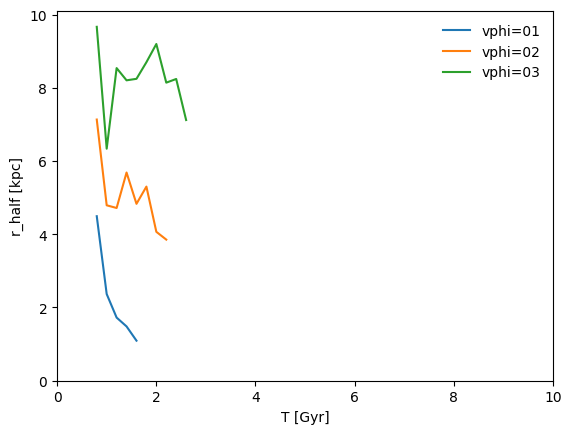

In [36]:
for vphi in vphi_list:
    print(rhalf[vphi])
    print(time[vphi])
    plt.plot(time[vphi], rhalf[vphi], label='vphi='+vphi)
    
plt.legend(frameon=False)

plt.xlim(0, 10)
plt.ylim(0, None)

plt.xlabel('T [Gyr]')
plt.ylabel('r_half [kpc]')

Text(0, 0.5, 'stellar mass [1E10 Msun]')

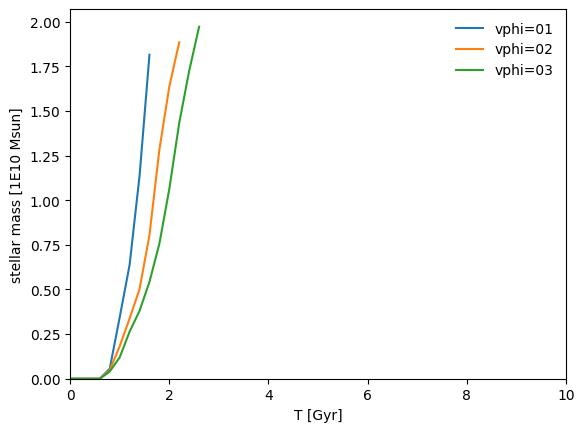

In [37]:
for vphi in vphi_list:
    plt.plot(time[vphi], stmass[vphi], label='vphi='+vphi)
    
plt.legend(frameon=False)

plt.xlim(0, 10)
plt.ylim(0, None)

plt.xlabel('T [Gyr]')
plt.ylabel('stellar mass [1E10 Msun]')

In [46]:
beta = '08'
vphi = '02'

sn_RC = {}
time = {}
rhalf = {}
stmass = {}

idx_list = np.arange(0, 101, 2)

RC_list = ['5', '9', '20', '30', '40']

for RC in RC_list:
    sn_RC[RC] = {}
    rhalf[RC] = []
    time[RC] = []
    stmass[RC] = []
    for idx in tqdm(idx_list):
        try:
            outname = 'lvl5-beta'+beta+'-RC'+RC+'-vphi'+vphi+'/output'
            sn_RC[RC] = arepo.Snapshot(outname, idx)
        except:
            continue
        
        time[RC].append(sn_RC[RC].Time.value)
        rhalf[RC].append(get_halfmass_radius(sn_RC[RC]))
        stmass[RC].append(get_stellar_mass(sn_RC[RC]))

100%|██████████| 51/51 [00:06<00:00,  7.50it/s]


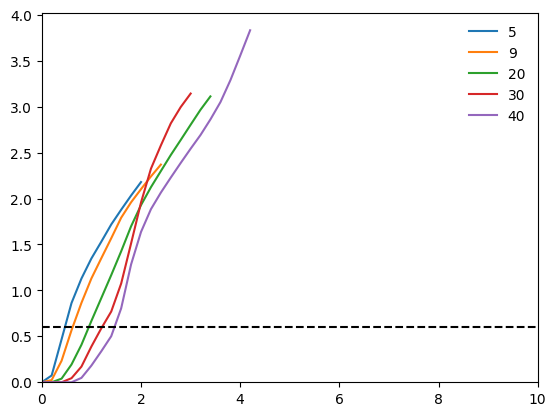

In [50]:
for RC in RC_list:
    plt.plot(time[RC], stmass[RC], label=RC)

plt.axhline(0.6, c='k', ls='dashed')
plt.xlim(0, 10)
plt.ylim(0, None)
plt.legend(frameon=False)